# Research Topic
- Using audit opinions to predict credit rating of stocks
- Natural Language Processing (NLP) using TF-IDF (Term Frequency-Inverse Document Frequency)
- XG Boosting
- Stratified K-folds Cross-validation
- Data used : critical audit opinions released in year 2023, as available on Wharton Research Data Services (WRDS), credit rating for year 2023, for 104 companies

# Model Performance
- Mean Absolute Error (MAE) of 2.6 (total range of credit rating is 22)

In [200]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

# Uploading data processed

In [178]:
df

,ratingsymbol,audit
0,B,Sufficiency of audit evidence over realizabili...
1,AA+,Uncertain Tax Positions. As discussed in Note ...
2,BBB-,Accounting for the Effects of Regulatory Matte...
3,BB-,Goodwill Impairment Assessment - Adtalem Brazi...
4,A-,Goodwill (Seed Reporting Unit) and Intangible ...
...,...,...
99,B+,Impairment of long-lived assets. Description o...
100,BB,Impairment of goodwill recorded in one reporti...
101,B+,Inventories - Excess Quantities and Obsolescen...
102,BBB+,Valuation of Customer Relationships and Traden...


### 22 credit ratings from AAA to D
- typical rating scales used by major credit rating agencies like Standard & Poor's, Moody's, and Fitch

In [183]:
rating_mapping = {
    'AAA': 21, 'AA+': 20, 'AA': 19, 'AA-': 18, 'A+': 17, 'A': 16, 'A-': 15,
    'BBB+': 14, 'BBB': 13, 'BBB-': 12, 'BB+': 11, 'BB': 10, 'BB-': 9, 'B+': 8, 'B': 7, 'B-': 6,
    'CCC+': 5, 'CCC': 4, 'CCC-': 3, 'CC': 2, 'C': 1,
    'D': 0,
}

df['ratingsymbol'] = df['ratingsymbol'].map(rating_mapping)

# NLP
- Data processing
    - Tokenization: break down text into smaller units (words or phrases)
    - Removing stopwords : remove words with little meaning ("the", "is")
    - Lemmatization/Stemming : reduce words to their base or root form
- Feature Extraction: convert text into numerical features
    - Bag of Words: Counts the frequency of words
    - TF-IDF (Term Frequency-Inverse Document Frequency): Weighs the word frequencies by how rare they are in the data
-  Select ML model:
    - XGBoost
        - A type of GBM
        - It is known for high performance in a variety of tasks, including text classification
- Train model
- Performance metrics
    - accuracy, precision, recall, etc

# TF-IDF (Term Frequency-Inverse Document Frequency)
- transform text data into numerical format
- Term Frequency (TF):
    - for each document
        - a more frequency term is more important in understanding the text
        - TF of a term = frequency of the term / total num of terms
- Inverse Document Frequency (IDF)
    - to compare across documents
        - IDF measure how important is a term across documents
        - = logarithmically scaled inverse of the number of documents that contain the term t. This helps to attenuate the effect of terms that occur very frequently across many documents and are thus less informative.
- TF-IDF term = TF term multiple by IDF term
- **High TF-IDF score = a term is frequent in a given document but not across documents, emphasizing its uniqueness and potential importance in the given document**
- Low TD-IDF score: 
    - either:
    - (1) the term appears in many documents across the collection (thus is common and potentially less informative) 
    - or (2) the term is rare in the specific document and in all documents
- sklearn's **TfidfVectorizer**
    - Input all the documents
    - Calc TD-IDF score for each term in all docuemnts
    
# GBM v.s. Random Forest
- Both are ensemble methods that use decision trees
- Bagging (Random Forest): Involves building multiple decision trees independently and combining their predictions through averaging or voting. The individual trees are built from bootstrap samples (random samples with replacement) of the training data.
- Boosting (GBM): Involves building trees sequentially, where each tree attempts to correct the errors of the previous ones. It combines these weak learners to form a strong predictive model. GBMs adjust the weight of each tree according to its performance, and trees are built focusing on errors made in previous stages.
    
# XGBoost
- eXtreme Gradient Boosting
- It is an advanced version of GBM, 
    - Pros:
        - Improved speed and accuracy
        - Regularization: Helps in reducing overfitting.
        - Tree Pruning: Uses depth-first approach, which is more effective than traditional level-wise approach.
            - Depth-First Tree Pruning: grow tree to max depth, then prune tree backward, allowing model to eliminate unncessary branches earlier
            - Level-Wise Approach (Traditional GBM): each level of nodes is expanded before moving to the next level, may lead to larger tree than necessary 
        - Built-in Cross-Validation: At each iteration.
       
        
# eval_metric='mlogloss'
- multiclass logloss
- a loss function during training, useful for classification problems with more than two classes
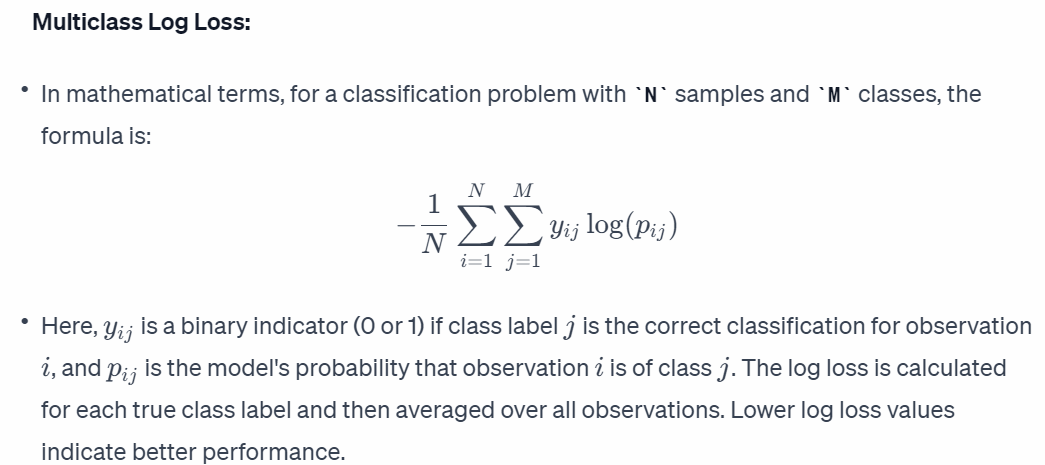

# stratified k-fold cross-validation
- better than train_test_split
- deals with sparse and imbalanced data
- solving 'imbalanced' data --> use stratified version of k-fold cross-validation, which will maintain the ratio of the classes in each fold as it is in the full dataset

# Training method
- Because of sparse data, I train XGB model on 100% of data
- But I want a guage of model performance on my data. So I use K-Folds Cross-Validation to calculate the average MAE

In [174]:
df

,ratingsymbol,audit,Name
0,B,Sufficiency of audit evidence over realizabili...,American Airlines Group Inc.
1,AA+,Uncertain Tax Positions. As discussed in Note ...,Apple Inc.
2,BBB-,Accounting for the Effects of Regulatory Matte...,Cleco Corporate Holdings LLC
3,BB-,Goodwill Impairment Assessment - Adtalem Brazi...,Adtalem Global Education Inc.
4,A-,Goodwill (Seed Reporting Unit) and Intangible ...,"EIDP, Inc."
...,...,...,...
99,B+,Impairment of long-lived assets. Description o...,Kosmos Energy Ltd.
100,BB,Impairment of goodwill recorded in one reporti...,Aramark
101,B+,Inventories - Excess Quantities and Obsolescen...,"MACOM Technology Solutions Holdings, Inc."
102,BBB+,Valuation of Customer Relationships and Traden...,"Fortune Brands Innovations, Inc."


In [201]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# n_splits=10 --> 10 iterations, each iteration: 1 fold test, 9 folds train. Always only 1 fold testing
# shuffle=True --> randomly split into folds for each iteration

mae_scores = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_pred_rounded = np.round(y_pred)
    y_pred_rounded = np.clip(y_pred_rounded, 0,21)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred_rounded))

average_mae = np.mean(mae_scores)
print(f"Average MAE: {average_mae}")

final_model = XGBRegressor()

Average MAE: 2.590909090909091


In [184]:
df['ratingsymbol'].value_counts()

ratingsymbol
8     21
9     15
10    14
7     11
13     9
11     8
12     6
6      5
15     4
14     4
20     2
2      2
0      1
5      1
18     1
Name: count, dtype: int64

In [202]:
# use 100% data for training 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['audit'])
y = df['ratingsymbol']
model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [185]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['audit'])
y = df['ratingsymbol']
model = XGBRegressor()
model.fit(X, y)

# Testing 
- 'test' = audit opinion of Microsoft, actually rating = AAA (21)
- y_pred = A- (15)

In [204]:
test=pd.read_excel('test.xlsx') # test data is the 'critical audit matters' of Microsoft in year 2023, credit rating AAA
X_test = vectorizer.transform(test['audit'])
y_pred = model.predict(X_test)
y_pred = np.clip(np.round(y_pred), 0, 21)

In [205]:
y_pred

array([15.], dtype=float32)

For this test case, the actual credit rating of Microsoft is AAA (correspond to a numerical rating of 21 in this case), but the model predicted A- (numerical ratinig of 15), which is a big difference

# Conclusion
- Model performance can be improved with more data. Current dataset is sparse (only 104 stocks) and imbalanced (large portion of data for credit rating between B to BB. Data for credit rating of 'C' is missing from the dataset)
- NLP requires a large amount of data to be effective, this is partly because human language are inherently more ambiguous than numbers